In [1]:
# final hr

In [2]:
import numpy as np
import pandas as pd

my_dtype = {'sales':object,
                    'salary':object,
                    'Work_accident':object,
                    'promotion_last_5years':object
                   }

df = pd.read_csv('./HR_comma_sep.csv',
                            header=0,
                            dtype=my_dtype)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
X = df[df.columns[df.columns != 'left']]

# check the shape
print('--------------------------------------')
print('Raw shape: (%i,%i)' %df.shape)
print('X shape: (%i,%i)' %X.shape)

# salary_dict = {'low': 0, 'medium': 1, 'high': 2}
# X['salary'] = X['salary'].map(salary_dict)
print(X.dtypes)
display(X)

--------------------------------------
Raw shape: (14999,10)
X shape: (14999,9)
satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident             object
promotion_last_5years     object
sales                     object
salary                    object
dtype: object


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,0,sales,low
1,0.80,0.86,5,262,6,0,0,sales,medium
2,0.11,0.88,7,272,4,0,0,sales,medium
3,0.72,0.87,5,223,5,0,0,sales,low
4,0.37,0.52,2,159,3,0,0,sales,low
...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,support,low
14995,0.37,0.48,2,160,3,0,0,support,low
14996,0.37,0.53,2,143,3,0,0,support,low
14997,0.11,0.96,6,280,4,0,0,support,low


In [4]:
# left（1：退職、0：非退職の正解ラベル）
y = df['left']
y.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [5]:
# カテゴリ変数のone-hotエンコーディング

# Work_accident({'事故なし': 0, '事故あり': 1})
# promotion_last_5years({'昇進なし': 0, '昇進あり': 1})

# 特徴変数
ohe_columns = ['sales',
                        'salary',
                        'Work_accident',
                        'promotion_last_5years'
                       ]

X_new = pd.get_dummies(X,
                                       dummy_na=True,
                                       columns=ohe_columns)

print(X_new.shape)
X_new.head()

(14999, 26)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,...,salary_high,salary_low,salary_medium,salary_nan,Work_accident_0,Work_accident_1,Work_accident_nan,promotion_last_5years_0,promotion_last_5years_1,promotion_last_5years_nan
0,0.38,0.53,2,157,3,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0


In [6]:
X_new.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,...,salary_high,salary_low,salary_medium,salary_nan,Work_accident_0,Work_accident_1,Work_accident_nan,promotion_last_5years_0,promotion_last_5years_1,promotion_last_5years_nan
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,...,14999.000000,14999.000000,14999.000000,14999.0,14999.000000,14999.000000,14999.0,14999.000000,14999.000000,14999.0
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.081805,0.052470,0.051137,0.049270,0.042003,...,0.082472,0.487766,0.429762,0.0,0.855390,0.144610,0.0,0.978732,0.021268,0.0
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.274077,0.222981,0.220284,0.216438,0.200602,...,0.275092,0.499867,0.495059,0.0,0.351719,0.351719,0.0,0.144281,0.144281,0.0
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.0,1.000000,0.000000,0.0
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.0,1.000000,0.000000,0.0
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.0,1.000000,0.000000,0.0,1.000000,0.000000,0.0
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000,0.0


In [7]:
# 欠損値確認
X_new.isnull().sum().sum()

0

In [8]:
# 次元圧縮
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier


selector = RFE(estimator=RandomForestClassifier(n_estimators=100,random_state=0),
                                                                            n_features_to_select=10,
                                                                            step=.05)
selector.fit(X_new,y)
print('Done normally')

Done normally


In [9]:
print(selector)
print(selector.support_)
print(selector.support_.sum())
print(X_new.columns[selector.support_])

RFE(estimator=RandomForestClassifier(random_state=0), n_features_to_select=10,
    step=0.05)
[ True  True  True  True  True False False False False False False False
  True False False False  True  True False False  True  True False False
 False False]
10
Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'sales_sales',
       'salary_high', 'salary_low', 'Work_accident_0', 'Work_accident_1'],
      dtype='object')


In [10]:
# 選ばれた特徴量の列のみ取得
X_new_selected = selector.transform(X_new)

X_new_selected = pd.DataFrame(data=X_new_selected, 
                                                  columns=X_new.columns[selector.support_], 
                                                 )
print('X shape after RFE:', X_new_selected.shape)
print('---------------------------------------')
print(X_new_selected.dtypes)
X_new_selected.head()

X shape after RFE: (14999, 10)
---------------------------------------
satisfaction_level      float64
last_evaluation         float64
number_project          float64
average_montly_hours    float64
time_spend_company      float64
sales_sales             float64
salary_high             float64
salary_low              float64
Work_accident_0         float64
Work_accident_1         float64
dtype: object


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,sales_sales,salary_high,salary_low,Work_accident_0,Work_accident_1
0,0.38,0.53,2.0,157.0,3.0,1.0,0.0,1.0,1.0,0.0
1,0.80,0.86,5.0,262.0,6.0,1.0,0.0,0.0,1.0,0.0
2,0.11,0.88,7.0,272.0,4.0,1.0,0.0,0.0,1.0,0.0
3,0.72,0.87,5.0,223.0,5.0,1.0,0.0,1.0,1.0,0.0
4,0.37,0.52,2.0,159.0,3.0,1.0,0.0,1.0,1.0,0.0


In [11]:
X_new_selected.join(y).head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,sales_sales,salary_high,salary_low,Work_accident_0,Work_accident_1,left
0,0.38,0.53,2.0,157.0,3.0,1.0,0.0,1.0,1.0,0.0,1
1,0.80,0.86,5.0,262.0,6.0,1.0,0.0,0.0,1.0,0.0,1
2,0.11,0.88,7.0,272.0,4.0,1.0,0.0,0.0,1.0,0.0,1
3,0.72,0.87,5.0,223.0,5.0,1.0,0.0,1.0,1.0,0.0,1
4,0.37,0.52,2.0,159.0,3.0,1.0,0.0,1.0,1.0,0.0,1


In [12]:
# 分類モデルの評価指標計算のための関数の読込
from sklearn.metrics import accuracy_score

In [13]:
# import libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Holdout
X_train,X_test,y_train,y_test = train_test_split(X_new_selected,y,
                                                                     test_size=0.30,
                                                                     random_state=1)


In [14]:
# アルゴリズムのセット
pipelines ={
    'knn':
        Pipeline([('scl',StandardScaler()),
                  ('est',KNeighborsClassifier())]),
    'logistic':
        Pipeline([('scl',StandardScaler()),
                  ('est',LogisticRegression(random_state=1))]),
    'rsvc':
        Pipeline([('scl',StandardScaler()),
                  ('est',SVC(C=1.0, kernel='rbf', class_weight='balanced', random_state=1))]),
    'lsvc':
        Pipeline([('scl',StandardScaler()),
                  ('est',LinearSVC(C=1.0, class_weight='balanced', random_state=1))]),
    'tree':
        Pipeline([('scl',StandardScaler()),
                  ('est',DecisionTreeClassifier(random_state=1))]),
    'rf':
        Pipeline([('scl',StandardScaler()),
                  ('est',RandomForestClassifier(random_state=1))]),
    'gb':
        Pipeline([('scl',StandardScaler()),
                  ('est',GradientBoostingClassifier(random_state=1))]),
    'mlp':
        Pipeline([('scl',StandardScaler()),
                  ('est',MLPClassifier(hidden_layer_sizes=(3,3),
                                       max_iter=1000,
                                       random_state=1))])
}

# fit the models
for pipe_name, pipeline in pipelines.items():
    pipeline.fit(X_train,y_train)
    print(pipe_name, ': Fitting Done')

knn : Fitting Done
logistic : Fitting Done
rsvc : Fitting Done


/Users/muranakayui/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


lsvc : Fitting Done
tree : Fitting Done
rf : Fitting Done
gb : Fitting Done
mlp : Fitting Done


In [15]:
scores = {}
for pipe_name, pipeline in pipelines.items():
    try:
        scores[(pipe_name,'train')] = accuracy_score(y_train, pipeline.predict(X_train))
        scores[(pipe_name,'test')] = accuracy_score(y_test, pipeline.predict(X_test))
#         scores[(pipe_name,'importance')] =  pipeline.steps[1][1].feature_importances_
    except:
        print(pipe_name)
pd.Series(scores).unstack()

,test,train
gb,0.976889,0.977236
knn,0.957778,0.970854
logistic,0.788222,0.794171
lsvc,0.749556,0.751500
mlp,0.952444,0.952757
rf,0.989778,1.000000
rsvc,0.949111,0.953043
tree,0.976889,1.000000


In [16]:
importances = pipelines['gb'][1].feature_importances_

<BarContainer object of 10 artists>

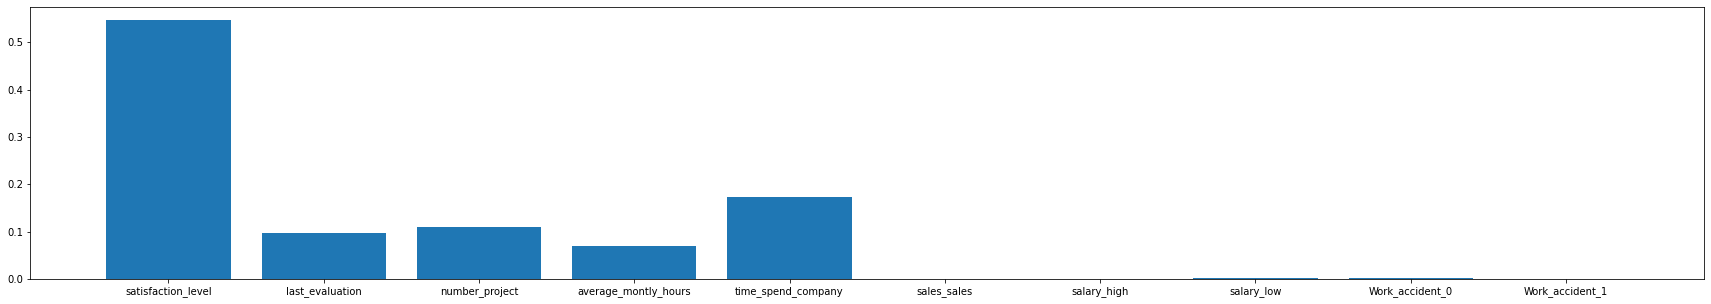

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 5))

plt.bar(X_new_selected.columns, importances)